<a href="https://colab.research.google.com/github/Ephraimosse9/Pytorch-course-on-UDEMY--Notes-and-Codes/blob/main/03_Computer_Vision_CNN_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Required Libraries

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

#DATA PREP

##Getting and Downloading Data

In [ ]:
#For rhis lession we will be working with the FahionMNIST data set.
#This is the train data, to get test we just change train to False
train_data = datasets.FashionMNIST(
    root= "data",
    train= True,
    transform= ToTensor(),
    download= True,
    target_transform= None
)

#Now testing Data
test_data = datasets.FashionMNIST(
    root= "data",
    download= True,
    train=False,
    transform= ToTensor(),
    target_transform=None
)

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label = train_data[1]
label

0

In [ ]:
class_names = train_data.classes #This is a List of the classes in the dataset
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_index = train_data.class_to_idx
class_to_index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

##Visualitizing Our data

Text(0.5, 1.0, 'T-shirt/top')

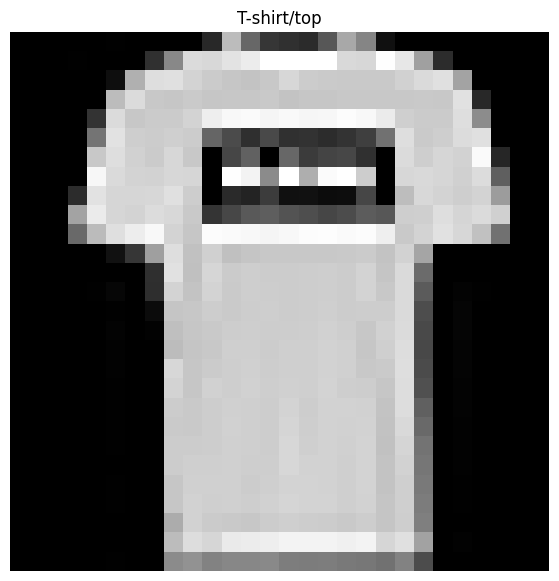

In [ ]:
#This will output an IMAGE from out dataset at the index position given
plt.figure(figsize=(10,7))
plt.imshow(image.squeeze(), cmap = "gray")
plt.axis(False)
plt.title(class_names[label])

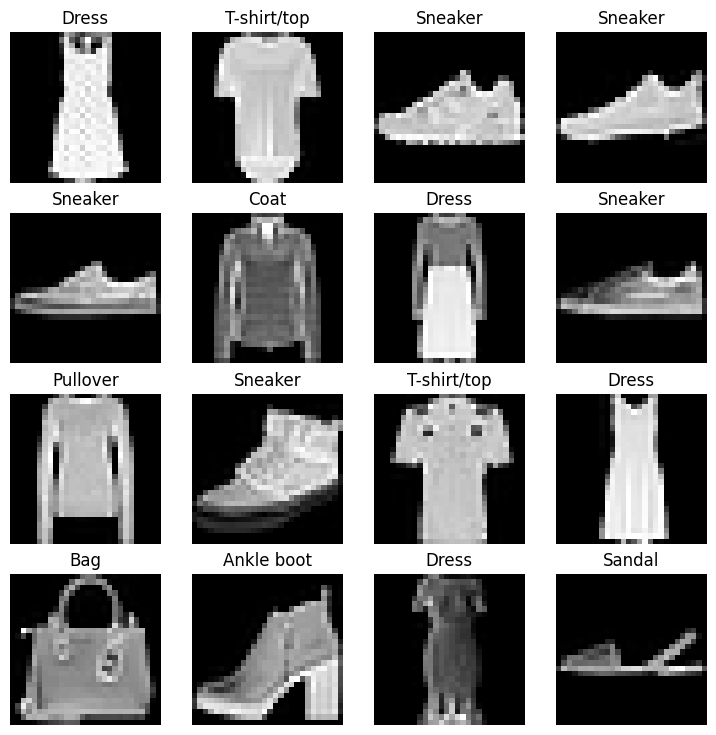

In [ ]:
#Now lets make a for loop that generates images at random
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols +1):
  random_index = torch.randint(0, len(train_data), size=[1]).item()
  image_1, label_1 = train_data[random_index]
  fig.add_subplot(rows,cols,i)   #adds to the plt
  plt.imshow(image_1.squeeze(), cmap="gray")
  plt.axis(False)
  plt.title(class_names[label_1])

##Loading Our Dataset

In [ ]:
train_dataloader = DataLoader(
    dataset= train_data,
    batch_size=32,
    shuffle= True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size= 32,
    shuffle= False
)

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
len(train_features_batch), train_labels_batch.shape

(32, torch.Size([32]))

In [ ]:
random_idx = torch.randint(0, len(train_features_batch), size= [1]).item()
image_2, label_2 = train_features_batch[random_idx], train_labels_batch[random_idx]
print(random_idx)

15


Text(0.5, 1.0, 'T-shirt/top')

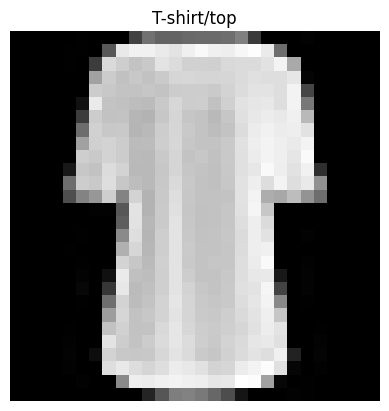

In [ ]:
plt.imshow(image_2.squeeze(), cmap="gray")
plt.axis(False)
plt.title(class_names[label_2])

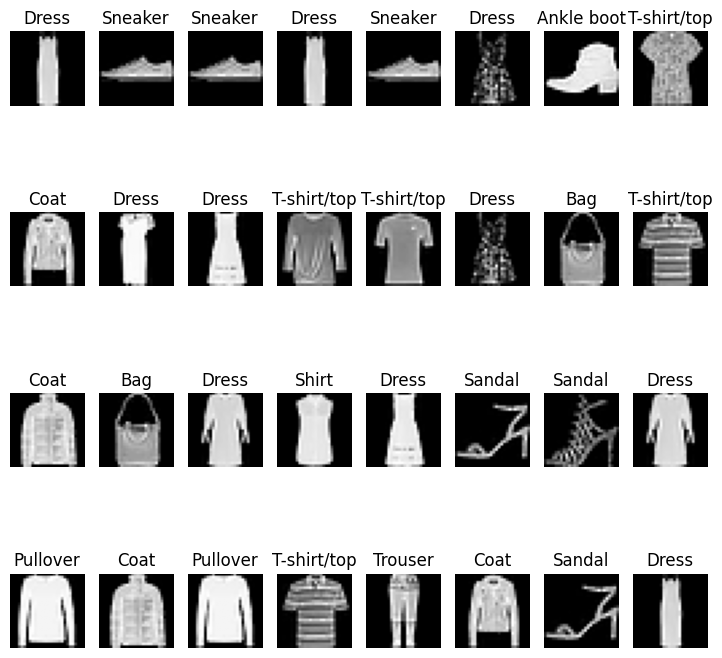

In [ ]:
def visualize_batches(batch_size, train_features_batch=train_features_batch, train_labels_batch=train_labels_batch):
  fig = plt.figure(figsize=(9,9))
  row, col = int(batch_size/8), int(batch_size/4)

  for i in range(1, row*col+1):
    rand_int = torch.randint(0, len(train_features_batch), size=[1]).item()
    img, lab = train_features_batch[rand_int], train_labels_batch[rand_int]
    fig.add_subplot(row, col, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.axis(False)
    plt.title(class_names[lab])

visualize_batches(32)

#MODEL CREATION

##Baseline Model

In [ ]:
#1st baseline model without Hidden Layer Activation

class FashionMNISTV0(nn.Module):
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

model_0 = FashionMNISTV0(input_shape=784, hidden_units= 64, output_shape=10)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_0.parameters(), lr= 0.1)

In [ ]:
from timeit import default_timer as timer
start_time = timer()
A= 2
B=3
c= A*B
print(c)
end_time = timer()
print(f"This is the start time: {start_time} | This is the end time: {end_time} | Total time: {end_time - start_time}")


6
This is the start time: 18514.18871432 | This is the end time: 18514.188930306 | Total time: 0.00021598600142169744


In [ ]:
start_time = timer()
print(2*3)
end_time = timer()
print(f"This is the start time: {start_time} | This is the end time: {end_time} | Total time: {end_time - start_time}")

6
This is the start time: 18514.196785343 | This is the end time: 18514.196921653 | Total time: 0.000136310001835227


In [ ]:
!pip install torchmetrics

In [ ]:
from torchmetrics.classification import Accuracy
accuracy_fn = Accuracy(task="multiclass", num_classes=10)

In [ ]:
# from tqdm.auto import tqdm
# torch.manual_seed(42)
# start_time = timer()
# epochs = 3
# for epoch in tqdm(range(epochs)):
#   train_loss, train_acc = 0,0
#   test_loss, test_acc =0,0
#   for X, y in train_dataloader:
#     #Model.train
#     model_0.train()

#     #do the forward pass
#     train_pred = model_0(X)

#     #calculate the loss
#     loss_1 = loss_fn(train_pred, y)
#     accuracy_1 = accuracy_fn(train_pred.argmax(dim=1), y)
#     train_loss += loss_1
#     train_acc += accuracy_1

#     #Optimizer zero grad
#     optimizer.zero_grad()

#     #loss backward
#     loss_1.backward()

#     #optimizer step step
#     optimizer.step()

#   train_loss /= len(train_dataloader)
#   train_acc /= len(train_dataloader)

#   model_0.eval()
#   with torch.inference_mode():
#     for X, y in test_dataloader:
#       test_pred = model_0(X)
#       loss_2 = loss_fn(test_pred, y)
#       accuracy_2 = accuracy_fn(test_pred.argmax(dim=1), y)
#       test_loss += loss_2
#       test_acc += accuracy_2

#     test_loss/= len(test_dataloader)
#     test_acc /= len(test_dataloader)

#   print(f"Epoch: {epoch} | Training Loss: {train_loss: .4f}, Training Accyracy: {train_acc*100: .2f} | Testing Loss: {test_loss: .4f}, Testing Accuracy: {test_acc*100: .2f}")

# end_time = timer()
# print(f"\n The Time took: {end_time - start_time}")

In [ ]:
#Lets Functionize an evaluation fuction but for our model functions

# def eval_model(model,test_dataLoader,loss_fn,accuracy_fn):
#   loss, acc = 0,0
#   model.eval()
#   with torch.inference_mode():
#     for X,y in test_dataloader:
#       y_pred = model(X)
#       test_loss = loss_fn(y_pred, y)
#       accuracy = accuracy_fn(y_pred.argmax(dim=1), y)
#       loss += test_loss
#       acc += accuracy
#     loss /= len(test_dataloader)
#     acc/=len(test_dataLoader)

#   return {"Model Name": model, "Model loss": loss.item(), "Model Accuracy": acc.item()*100}

# eval_model(model=model_0, test_dataLoader=test_dataloader, loss_fn = loss_fn, accuracy_fn=accuracy_fn)

In [ ]:
def training_step(model, train_dataloader, loss_fn, accuracy_fn, optimizer):
  model.train()
  train_loss, train_acc = 0,0
  for X,y in train_dataloader:
    y_pred = model(X)
    loss_1 = loss_fn(y_pred, y)
    accuracy = accuracy_fn(y_pred.argmax(dim=1), y) # Corrected argmax
    train_loss += loss_1
    train_acc += accuracy
    optimizer.zero_grad()
    loss_1.backward()
    optimizer.step()
  train_loss/=len(train_dataloader)
  train_acc/=len(train_dataloader)
  return train_loss, train_acc # Return loss and accuracy

In [ ]:
def testing_step(model, test_dataloader, loss_fn, accuracy_fn):
  model.eval()
  loss,acc = 0,0
  with torch.inference_mode():
    for X,y in test_dataloader:
      y_pred = model(X)
      loss_1 = loss_fn(y_pred, y)
      accuracy = accuracy_fn(y_pred.argmax(dim=1), y) # Corrected argmax
      loss += loss_1
      acc += accuracy
    loss/=len(test_dataloader)
    acc/=len(test_dataloader)
  return loss, acc # Return loss and accuracy

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(42)
start_time = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  train_loss, train_acc = training_step(model=model_0, train_dataloader= train_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, optimizer=optimizer)
  test_loss, test_acc = testing_step(model=model_0, test_dataloader= train_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

  print(f"Epoch: {epoch} | Training Loss: {train_loss: .4f}, Training Accyracy: {train_acc*100: .2f} | Testing Loss: {test_loss: .4f}, Testing Accuracy: {test_acc*100: .2f}")

end_time = timer()
print(f"\n The Time took: {end_time - start_time}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 | Training Loss:  0.6009, Training Accyracy:  78.50 | Testing Loss:  0.4726, Testing Accuracy:  83.45
Epoch: 1 | Training Loss:  0.4821, Training Accyracy:  83.02 | Testing Loss:  0.4956, Testing Accuracy:  82.83
Epoch: 2 | Training Loss:  0.4624, Training Accyracy:  83.88 | Testing Loss:  0.4920, Testing Accuracy:  83.15

 The Time took: 77.97020089399666


In [ ]:
def eval_model(model,test_dataLoader,loss_fn,accuracy_fn):
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      y_pred = model(X)
      test_loss = loss_fn(y_pred, y)
      accuracy = accuracy_fn(y_pred.argmax(dim=1), y)
      loss += test_loss
      acc += accuracy
    loss /= len(test_dataloader)
    acc/=len(test_dataLoader)

  return {"Model Name": model, "Model loss": loss.item(), "Model Accuracy": acc.item()*100}

eval_model(model=model_0, test_dataLoader=test_dataloader, loss_fn = loss_fn, accuracy_fn=accuracy_fn)

{'Model Name': FashionMNISTV0(
   (layer_stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=64, bias=True)
     (2): Linear(in_features=64, out_features=64, bias=True)
     (3): Linear(in_features=64, out_features=10, bias=True)
   )
 ),
 'Model loss': 0.5455324053764343,
 'Model Accuracy': 82.02875256538391}